Objective: You are required to create a robust model that allows stakeholders to predict the condition of a used vehicle.

Actions to Perform:

Predict the condition of a vehicle based on its features.


Plot the most important features.

Train multiple classifiers and compare the accuracy.

Evaluate the XGBoost model with K-fold cross-validation.

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [79]:
df= pd.read_csv("C:\\Users\\shiva\\Downloads\\1566806560_lesson_9_project\\car_evaluation.csv")
df.head(10)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


Columns are categorical, check for unique values of each column¶

In [81]:
for i in df.columns:
    print(df[i].unique())

['vhigh' 'high' 'med' 'low']
['vhigh' 'high' 'med' 'low']
['2' '3' '4' '5more']
['2' '4' 'more']
['small' 'med' 'big']
['low' 'med' 'high']
['unacc' 'acc' 'vgood' 'good']


In [82]:
for i in df.columns:
    print(df[i].value_counts())

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


From above output, it is clear that all the columns except 'class' are distributed equally among data.

Class Distribution

<AxesSubplot:xlabel='class', ylabel='count'>

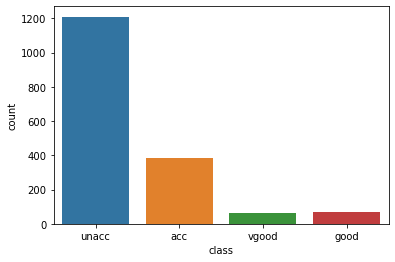

In [83]:
sns.countplot(df['class'])

Label Encoding

In [84]:
from sklearn.preprocessing import LabelEncoder

In [85]:
le= LabelEncoder()
for i in df.columns:
    df[i]=le.fit_transform(df[i])
    
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


<AxesSubplot:>

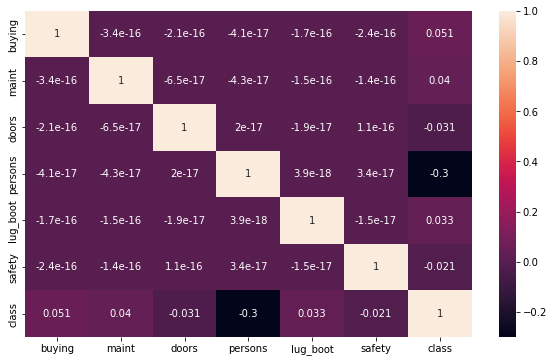

In [86]:
fig= plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot= True)

In [87]:
X= df[df.columns[:-1]]
Y= df['class']

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.3, random_state=1)

### Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
lr= LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

In [92]:
pr= lr.predict(X_test)

In [93]:
print(lr.score(X_test, Y_test))

0.6897880539499036


### KNN Classifier

In [94]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [95]:
knn= KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [96]:
pr= knn.predict(X_test)

In [97]:
print(knn.score(X_test, Y_test))

0.9190751445086706


In [98]:
print(classification_report(Y_test, pr))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       111
           1       0.87      0.59      0.70        22
           2       0.94      0.99      0.96       368
           3       1.00      0.67      0.80        18

    accuracy                           0.92       519
   macro avg       0.91      0.76      0.82       519
weighted avg       0.92      0.92      0.92       519



Accuracy can't be a fair criterion to evaluate unbalanced classification, so check 'f1-score' f1-score is 0.9 which is better than previous model

In [106]:
avg_score= []
for i in range(2, 30):
    knn= KNeighborsClassifier(n_neighbors=i)
    score= cross_val_score(knn, X_train, Y_train, cv= 5, scoring= 'accuracy')
    avg_score.append(score.mean())

Text(0, 0.5, 'accuracy')

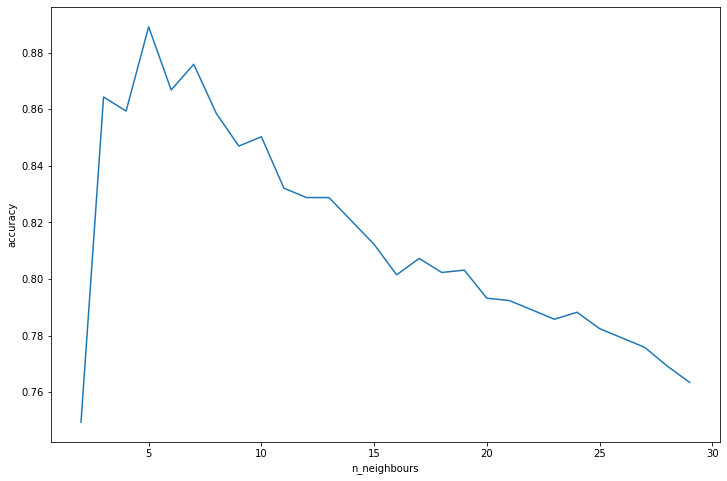

In [107]:
plt.figure(figsize=(12,8))
plt.plot(range(2,30),avg_score)
plt.xlabel("n_neighbours")
plt.ylabel("accuracy")

So, n_neighbours=5 is giving better accuracy as well as f1-score for our data.

### Random Forest Classifier

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [118]:
rfc= RandomForestClassifier( )
rfc.fit(X_train, Y_train)

RandomForestClassifier(random_state=1)

In [119]:
pr= rfc.predict(X_test)

In [120]:
print(rfc.score(X_test, Y_test))

0.9672447013487476
